In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
df = pd.read_csv('Project1Train.csv')
X = df[['x']].to_numpy()
y = df[['y']].to_numpy()

In [ ]:
dfTest = pd.read_csv('Project1Test.csv')
X_test = dfTest[['x']].to_numpy()
y_test = dfTest[['y']].to_numpy()

In [ ]:
def wm(point, X, tau):     
  m = X.shape[0]
  w = np.mat(np.eye(m)) 
  for i in range(m): 
    xi = X[i] 
    d = (-2 * tau * tau) 
    w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d)     
  return w

In [ ]:
def predict(X, y, point, tau):     
  m = X.shape[0]  
  X_ = np.append(X, np.ones(m).reshape(m,1), axis=1)
  point_ = np.array([point, 1], dtype=object)
  w = wm(point_, X_, tau)
  theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))
  pred = np.dot(point_, theta)
  return theta, pred

In [ ]:
def plot_predictions(X, y, tau, X_test, y_test, option20): 
  preds = []
  if option20 == True:
    X = X[:20]
    y = y[:20]
  for point in X_test: 
    theta, pred = predict(X, y, point, tau) 
    preds.append(pred)
  X_test = np.array(X_test).reshape(len(X_test), 1)
  preds = np.array(preds).reshape(len(preds), 1)
  plt.plot(X_test, y_test, 'b.')
  plt.plot(X_test, preds, 'r.')
  plt.legend(['real', 'predictions'])
  plt.show()
  print(np.sum(y_test-preds))

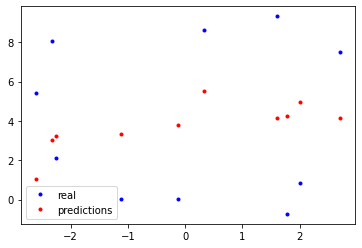

[3.79491471]


In [ ]:
plot_predictions(X, y, 0.214, X_test, y_test, option20 = False)